#### Import Libraries
- `numpy` contains a large collection of mathematical functions
- `pandas` contains functions that are designed for data manipulation and data analysis

In [1]:
import numpy as np
import pandas as pd

- `matplotlib.pyplot` contains functions to create interactive plots

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

- `train_test_split` divides a dataset into two subsets

In [3]:
from sklearn.model_selection import train_test_split

- `accuracy_score` computes the accuracy score of a model
- `confusion_matrix` computes the confusion matrix of a model
- `ConfusionMatrixDisplay` shows the visualization of a confusion matrix

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [87]:
from sklearn.model_selection import GridSearchCV

## Gaussian Naive Bayes
As said in the module, Gaussian Naive Bayes deals with continuous values, which it assumes to be normally distributed, for its features. Due to this, we would be exploring the iris dataset.

#### Loading the Dataset

In [9]:
from sklearn.datasets import load_iris

As seen below, this dataset contains 150 instances with the following features:
- sepal length (cm)	
- sepal width (cm)	
- petal length (cm)	
- petal width (cm)

Given these features, the task is to determine if the species of a flower is setosa, versicolor, or viriginica, which is represented as `0`, `1`, and `2` respectively.

In [10]:
data_iris = load_iris()
iris = pd.DataFrame(data_iris.data,columns=data_iris.feature_names)
iris['species'] = pd.Series(data_iris.target)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


The `X` will now be separated from our target `y`. 

In [11]:
X_iris = iris.values[:,:-1]
y_iris = iris.values[:,-1].astype(int)

Lastly, the training set is separated from the test set.

In [12]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, stratify=y_iris, test_size=0.3, random_state=8)

#### Training the Model
We would be using sklearn's `GaussianNB` model.

In [13]:
from sklearn.naive_bayes import GaussianNB

First, we will initialize the GaussianNB model with default parameters.

In [14]:
gnb = GaussianNB()

This model is fitted with the `X_train_iris` and `y_train_iris` as follows:

In [15]:
gnb.fit(X_train_iris, y_train_iris)

GaussianNB()

#### Checking the Performance
The train predictions will now be retrieved.

In [16]:
train_predictions_iris = gnb.predict(X_train_iris)

With these predictions, the training accuracy of the model can be computed.

In [17]:
print('Train Accuracy', accuracy_score(y_train_iris, train_predictions_iris))

Train Accuracy 0.9904761904761905


To visualize the train prediction results, a confusion matrix is generated.

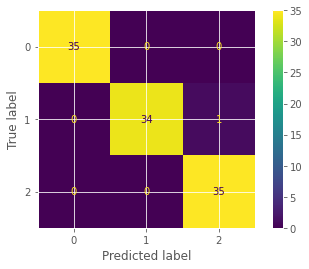

In [18]:
ConfusionMatrixDisplay(confusion_matrix(y_train_iris, train_predictions_iris), display_labels=gnb.classes_).plot()
plt.show()

Now, let us get the model's test predictions.

In [19]:
test_predictions_iris = gnb.predict(X_test_iris)

Then, we can check the test accuracy score of the model.

In [20]:
print('Test Accuracy', accuracy_score(y_test_iris, test_predictions_iris))

Test Accuracy 0.8666666666666667


And lastly, the test predictions are visualized with a confusion matrix.

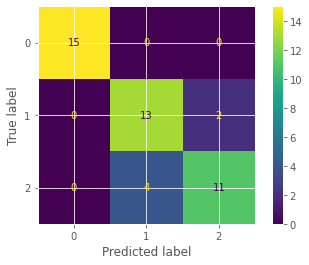

In [21]:
ConfusionMatrixDisplay(confusion_matrix(y_test_iris, test_predictions_iris), display_labels=gnb.classes_).plot()
plt.show()

TODO: chuchuchu

#### Tuning the Hyperparameters
To further improve this model, the hyperparameters can be tuned.

In [116]:
hyperparameters = [{
    'var_smoothing' : [1e-9, 1e-6, 1e-3, 1]
}]

A GridSearchCV will be used to test all combinations of `alpha` and `fit_prior` on the model.

In [117]:
gnb_tuned = GridSearchCV(GaussianNB(), hyperparameters)

This cross-validation model will then be trained.

In [118]:
gnb_tuned.fit(X_train_iris, y_train_iris)
print('Best parameters:', gnb_tuned.best_params_)
print('Validation Accuracy', gnb_tuned.best_score_)

Best parameters: {'var_smoothing': 1e-09}
Validation Accuracy 0.980952380952381


With this, we can gauge the performance of the tuned model.

Train Accuracy 0.9904761904761905
Test Accuracy 0.8666666666666667


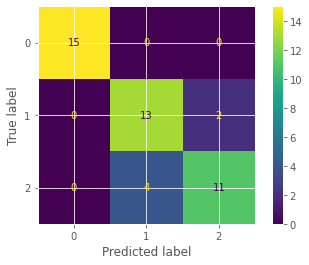

In [121]:
train_predictions_iris = gnb_tuned.predict(X_train_iris)
print('Train Accuracy', accuracy_score(y_train_iris, train_predictions_iris))
test_predictions_iris = gnb_tuned.predict(X_test_iris)
print('Test Accuracy', accuracy_score(y_test_iris, test_predictions_iris))
ConfusionMatrixDisplay(confusion_matrix(y_test_iris, test_predictions_iris), display_labels=gnb_tuned.classes_).plot()
plt.show()

TODO: chuchuchu

## Multinomial Naive Bayes
While Gaussian Naive Bayes deal with continuous data, Multinomial Naive Bayes handles discrete data—this does not necessarily mean whole numbers, but this means numbers that represent occurrences and proportions. The digits dataset will be used to demonstrate the capabilities of Multinomial Naive Bayes.

#### Loading the Dataset

In [93]:
from sklearn.datasets import load_digits

As seen below, this dataset contains 1797 instances with each feature corresponding to a pixel for an 8x8 image (e.g., `pixel_0_0`). 

With these features, the task is to determine which number (i.e., from 0-9) is represented in an image.

In [94]:
data_digits = load_digits()
digits = pd.DataFrame(data_digits.data,columns=data_digits.feature_names)
digits['target'] = pd.Series(data_digits.target)
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


The `X` will now be separated from our target `y`. 

In [95]:
X_digits = digits.values[:,:-1]
y_digits = digits.values[:,-1].astype(int)

Lastly, the training set is separated from the test set.

In [96]:
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, stratify=y_digits, test_size=0.3, random_state=8)

#### Training the Model
To explore how we train a Multinomial Naive Bayes model, we will import sklearn's `MultinomialNB` class.

In [97]:
from sklearn.naive_bayes import MultinomialNB

As we now have imported the needed classes, we can now declare a `MultinomialNB` object with the default parameters: (1) **alpha = 1.0**, which means that the Additive smoothing is equal to 1 (i.e., we assume that all events are seen at least once), and (2) **fit_prior = True**, which means class prior probabilities are computed.

In [98]:
mnb = MultinomialNB()

This model is trained using the `X_train_digits` and `y_train_digits` data as follows:

In [99]:
mnb.fit(X_train_digits, y_train_digits)

MultinomialNB()

#### Checking the Performance
The train predictions of this model will now be obtained.

In [100]:
train_predictions_digits = mnb.predict(X_train_digits)

Given these predictions, the model's training accuracy can be computed.

In [101]:
print('Train Accuracy', accuracy_score(y_train_digits, train_predictions_digits))

Train Accuracy 0.9132856006364359


A confusion matrix is also generated with the predictions for a visual representation.

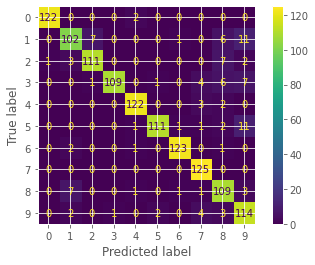

In [102]:
cm = confusion_matrix(y_train_digits, train_predictions_digits, labels=mnb.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_).plot()
plt.show()

Now, the model will predict the labels of the test data.

In [103]:
test_predictions_digits = mnb.predict(X_test_digits)

Then, we can check the test accuracy score of the model.

In [104]:
print('Test Accuracy', accuracy_score(y_test_digits, test_predictions_digits))

Test Accuracy 0.8962962962962963


And lastly, the test predictions are visualized with a confusion matrix.

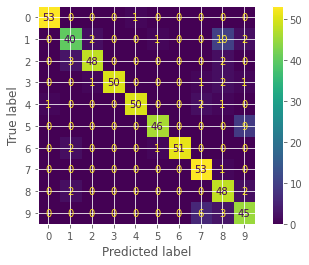

In [105]:
cm = confusion_matrix(y_test_digits, test_predictions_digits, labels=mnb.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_).plot()
plt.show()

TODO: chuchuchu

#### Tuning the Hyperparameters
To further improve this model, the hyperparameters can be tuned.

In [106]:
hyperparameters = [{
    'alpha' : [0.001, 0.01, 0.1, 1, 3, 5, 10, 15, 20, 50], 
    'fit_prior' : [False, True]
}]

A GridSearchCV will be used to test all combinations of `alpha` and `fit_prior` on the model.

In [107]:
mnb_tuned = GridSearchCV(MultinomialNB(), hyperparameters)

This cross-validation model will then be trained.

In [110]:
mnb_tuned.fit(X_train_digits, y_train_digits)
print('Best parameters:', mnb_tuned.best_params_)
print('Validation Accuracy', mnb_tuned.best_score_)

Best parameters: {'alpha': 20, 'fit_prior': False}
Validation Accuracy 0.9045184341997091


With this, we can gauge the performance of the tuned model.

Train Accuracy 0.9108989657915673
Test Accuracy 0.8981481481481481


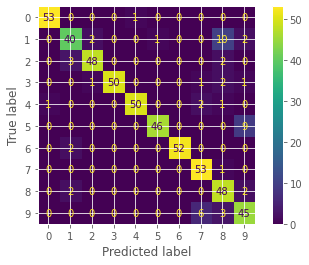

In [111]:
train_predictions_digits = mnb_tuned.predict(X_train_digits)
print('Train Accuracy', accuracy_score(y_train_digits, train_predictions_digits))
test_predictions_digits = mnb_tuned.predict(X_test_digits)
print('Test Accuracy', accuracy_score(y_test_digits, test_predictions_digits))
cm = confusion_matrix(y_test_digits, test_predictions_digits, labels=mnb_tuned.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb_tuned.classes_).plot()
plt.show()

TODO: chuchuchu

## Bernoulli Naive Bayes

TODO: chuchu

#### Generating the Dataset
We will be generating a dataset with discrete features and binary classes. This will be done using sklearn's `make_classification` function.

In [230]:
from sklearn.datasets import make_classification

As seen below, this generated dataset would contain 1000 instances with the 20 features.

With this, the task is to determine if an instance is of class `0` or class `1`.

In [249]:
X_clf, y_clf = make_classification(n_samples=1000, class_sep=5, random_state=8)
pd.DataFrame(np.c_[X_clf, y_clf])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.846505,-0.023321,5.947726,0.106389,-0.919395,1.335738,1.171215,-0.008739,-0.944069,-0.388608,...,-0.174402,-1.129708,-0.636207,-0.712915,-0.496050,0.641064,-5.357693,-1.244719,4.835961,1.0
1,0.005108,0.633238,-7.709065,0.666766,1.029027,1.496175,0.115476,-0.187327,-0.521929,-0.600468,...,0.848875,0.829910,-0.286861,-0.087054,1.455225,-1.668096,5.855202,1.266643,-6.532618,0.0
2,-0.000302,-1.128944,3.381707,1.298482,1.387366,0.308517,-1.006711,0.111402,0.482312,1.025864,...,-0.273321,0.556527,-0.961626,-1.269991,-6.619995,0.370692,5.451687,-0.980561,4.813817,1.0
3,-0.208211,-0.784519,-3.712631,-0.614977,-1.062531,0.824113,-0.616968,-0.412415,-0.860892,-0.747823,...,-0.335001,0.632688,0.868737,-0.359242,6.390912,-1.197064,-4.809432,1.447597,-4.999285,0.0
4,1.443565,-0.608787,-3.637705,-0.526138,-0.066589,0.475833,-0.545094,0.211435,2.372755,-0.440273,...,1.169945,-0.149709,0.410386,0.584659,6.566316,-0.463751,-5.120485,-0.310986,-4.997527,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.716554,-1.908159,5.416983,0.924848,-0.840231,0.185634,-0.353211,0.014009,0.650882,-2.432511,...,0.451828,0.799506,0.724888,1.043760,0.168978,2.267649,-5.711920,-0.534103,4.202248,1.0
996,-0.841131,0.379229,5.450710,0.070642,0.311488,-1.275189,0.878991,-0.038427,0.162487,0.633021,...,-0.446529,0.038454,-0.512946,-0.739004,-0.327291,-0.408540,-5.080675,-1.002737,4.390386,1.0
997,1.388038,1.192313,-3.930264,0.352019,-0.331097,-0.326835,1.525909,0.675665,-0.007302,0.481295,...,0.372844,-0.589714,0.617289,0.083496,5.597428,0.299775,-3.525150,0.704581,-4.911893,0.0
998,-0.318155,1.584778,-3.618762,0.538593,0.952642,-0.537217,0.504928,-1.166782,2.160712,-0.527574,...,0.021149,0.824065,1.325293,0.917335,7.016281,-0.108255,-5.742979,0.167817,-5.129190,0.0


As `make_classification` produces continuous values, the values for `X` will be turned into discrete values. The final `X` data is shown below:

In [232]:
X_clf = X_clf.astype(int)
X_clf

array([[ 1,  0,  5, ..., -5, -1,  4],
       [ 0,  0, -7, ...,  5,  1, -6],
       [ 0, -1,  3, ...,  5,  0,  4],
       ...,
       [ 1,  1, -3, ..., -3,  0, -4],
       [ 0,  1, -3, ..., -5,  0, -5],
       [ 0,  0, -3, ..., -7,  0, -5]])

As stated, the final `y` values will be comprised of only `0` and `1`.

In [233]:
y_clf

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,

Lastly, the training set is separated from the test set.

In [234]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, stratify=y_clf, test_size=0.3, random_state=8)

#### Training the Model
To see the Bernoulli model in action, we will import sklearn's `BernoulliNB` class.

In [235]:
from sklearn.naive_bayes import BernoulliNB

First, we will initialize the `BernoulliNB` model with default parameters.

In [236]:
bnb = BernoulliNB()

This model will be trained on the `X_train_clf` and `y_train_clf` data as follows:

In [237]:
bnb.fit(X_train_clf, y_train_clf)

BernoulliNB()

#### Checking the Performance
The train predictions of this model will now be obtained.

In [238]:
train_predictions_clf = bnb.predict(X_train_clf)

Given these predictions, the model's training accuracy can be computed.

In [239]:
print('Train Accuracy', accuracy_score(y_train_clf, train_predictions_clf))

Train Accuracy 0.9942857142857143


A confusion matrix is also generated with the predictions for a visual representation.

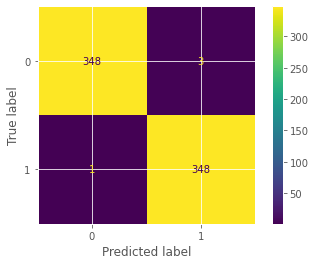

In [240]:
ConfusionMatrixDisplay(confusion_matrix(y_train_clf, train_predictions_clf), display_labels=bnb.classes_).plot()
plt.show()

Now, the model will predict the labels of the test data.

In [241]:
test_predictions_clf = bnb.predict(X_test_clf)

Then, we can check the test accuracy score of the model.

In [242]:
print('Test Accuracy', accuracy_score(y_test_clf, test_predictions_clf))

Test Accuracy 0.99


And lastly, the test predictions are visualized with a confusion matrix.

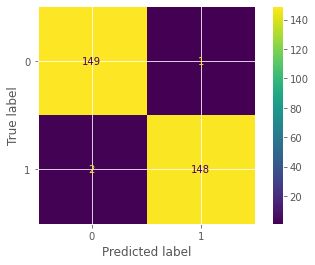

In [243]:
ConfusionMatrixDisplay(confusion_matrix(y_test_clf, test_predictions_clf), display_labels=bnb.classes_).plot()
plt.show()

TODO: chuchuchu

#### Tuning the Hyperparameters
To further improve this model, the hyperparameters can be tuned.

In [244]:
hyperparameters = [{
    'alpha' : [0.001, 0.01, 0.1, 1, 3, 5, 10, 15, 20, 50], 
    'fit_prior' : [False, True]
}]

A GridSearchCV will be used to test all combinations of `alpha` and `fit_prior` on the model.

In [245]:
bnb_tuned = GridSearchCV(BernoulliNB(), hyperparameters)

This cross-validation model will then be trained.

In [246]:
bnb_tuned.fit(X_train_clf, y_train_clf)
print('Best parameters:', bnb_tuned.best_params_)
print('Validation Accuracy', bnb_tuned.best_score_)

Best parameters: {'alpha': 0.001, 'fit_prior': False}
Validation Accuracy 0.9942857142857143


With this, we can gauge the performance of the tuned model.

Train Accuracy 0.9942857142857143
Test Accuracy 0.99


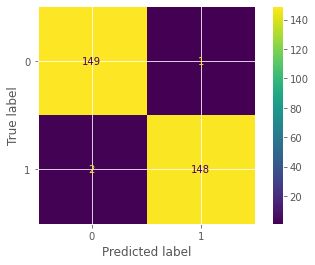

In [247]:
train_predictions_clf = bnb_tuned.predict(X_train_clf)
print('Train Accuracy', accuracy_score(y_train_clf, train_predictions_clf))
test_predictions_clf = bnb_tuned.predict(X_test_clf)
print('Test Accuracy', accuracy_score(y_test_clf, test_predictions_clf))
ConfusionMatrixDisplay(confusion_matrix(y_test_clf, test_predictions_clf), display_labels=bnb_tuned.classes_).plot()
plt.show()

TODO: chuchuchu